In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(os.path.join(module_path, 'scripts'))

In [2]:
import math

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import utils

In [3]:
utils.set_project_dir()

In [4]:
# Directory for figures
fig_dir = 'ml/figures'

In [5]:
country_codes = ['ESP', 'EST', 'ETH', 'USA']

# Daily data

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator
FixedFor

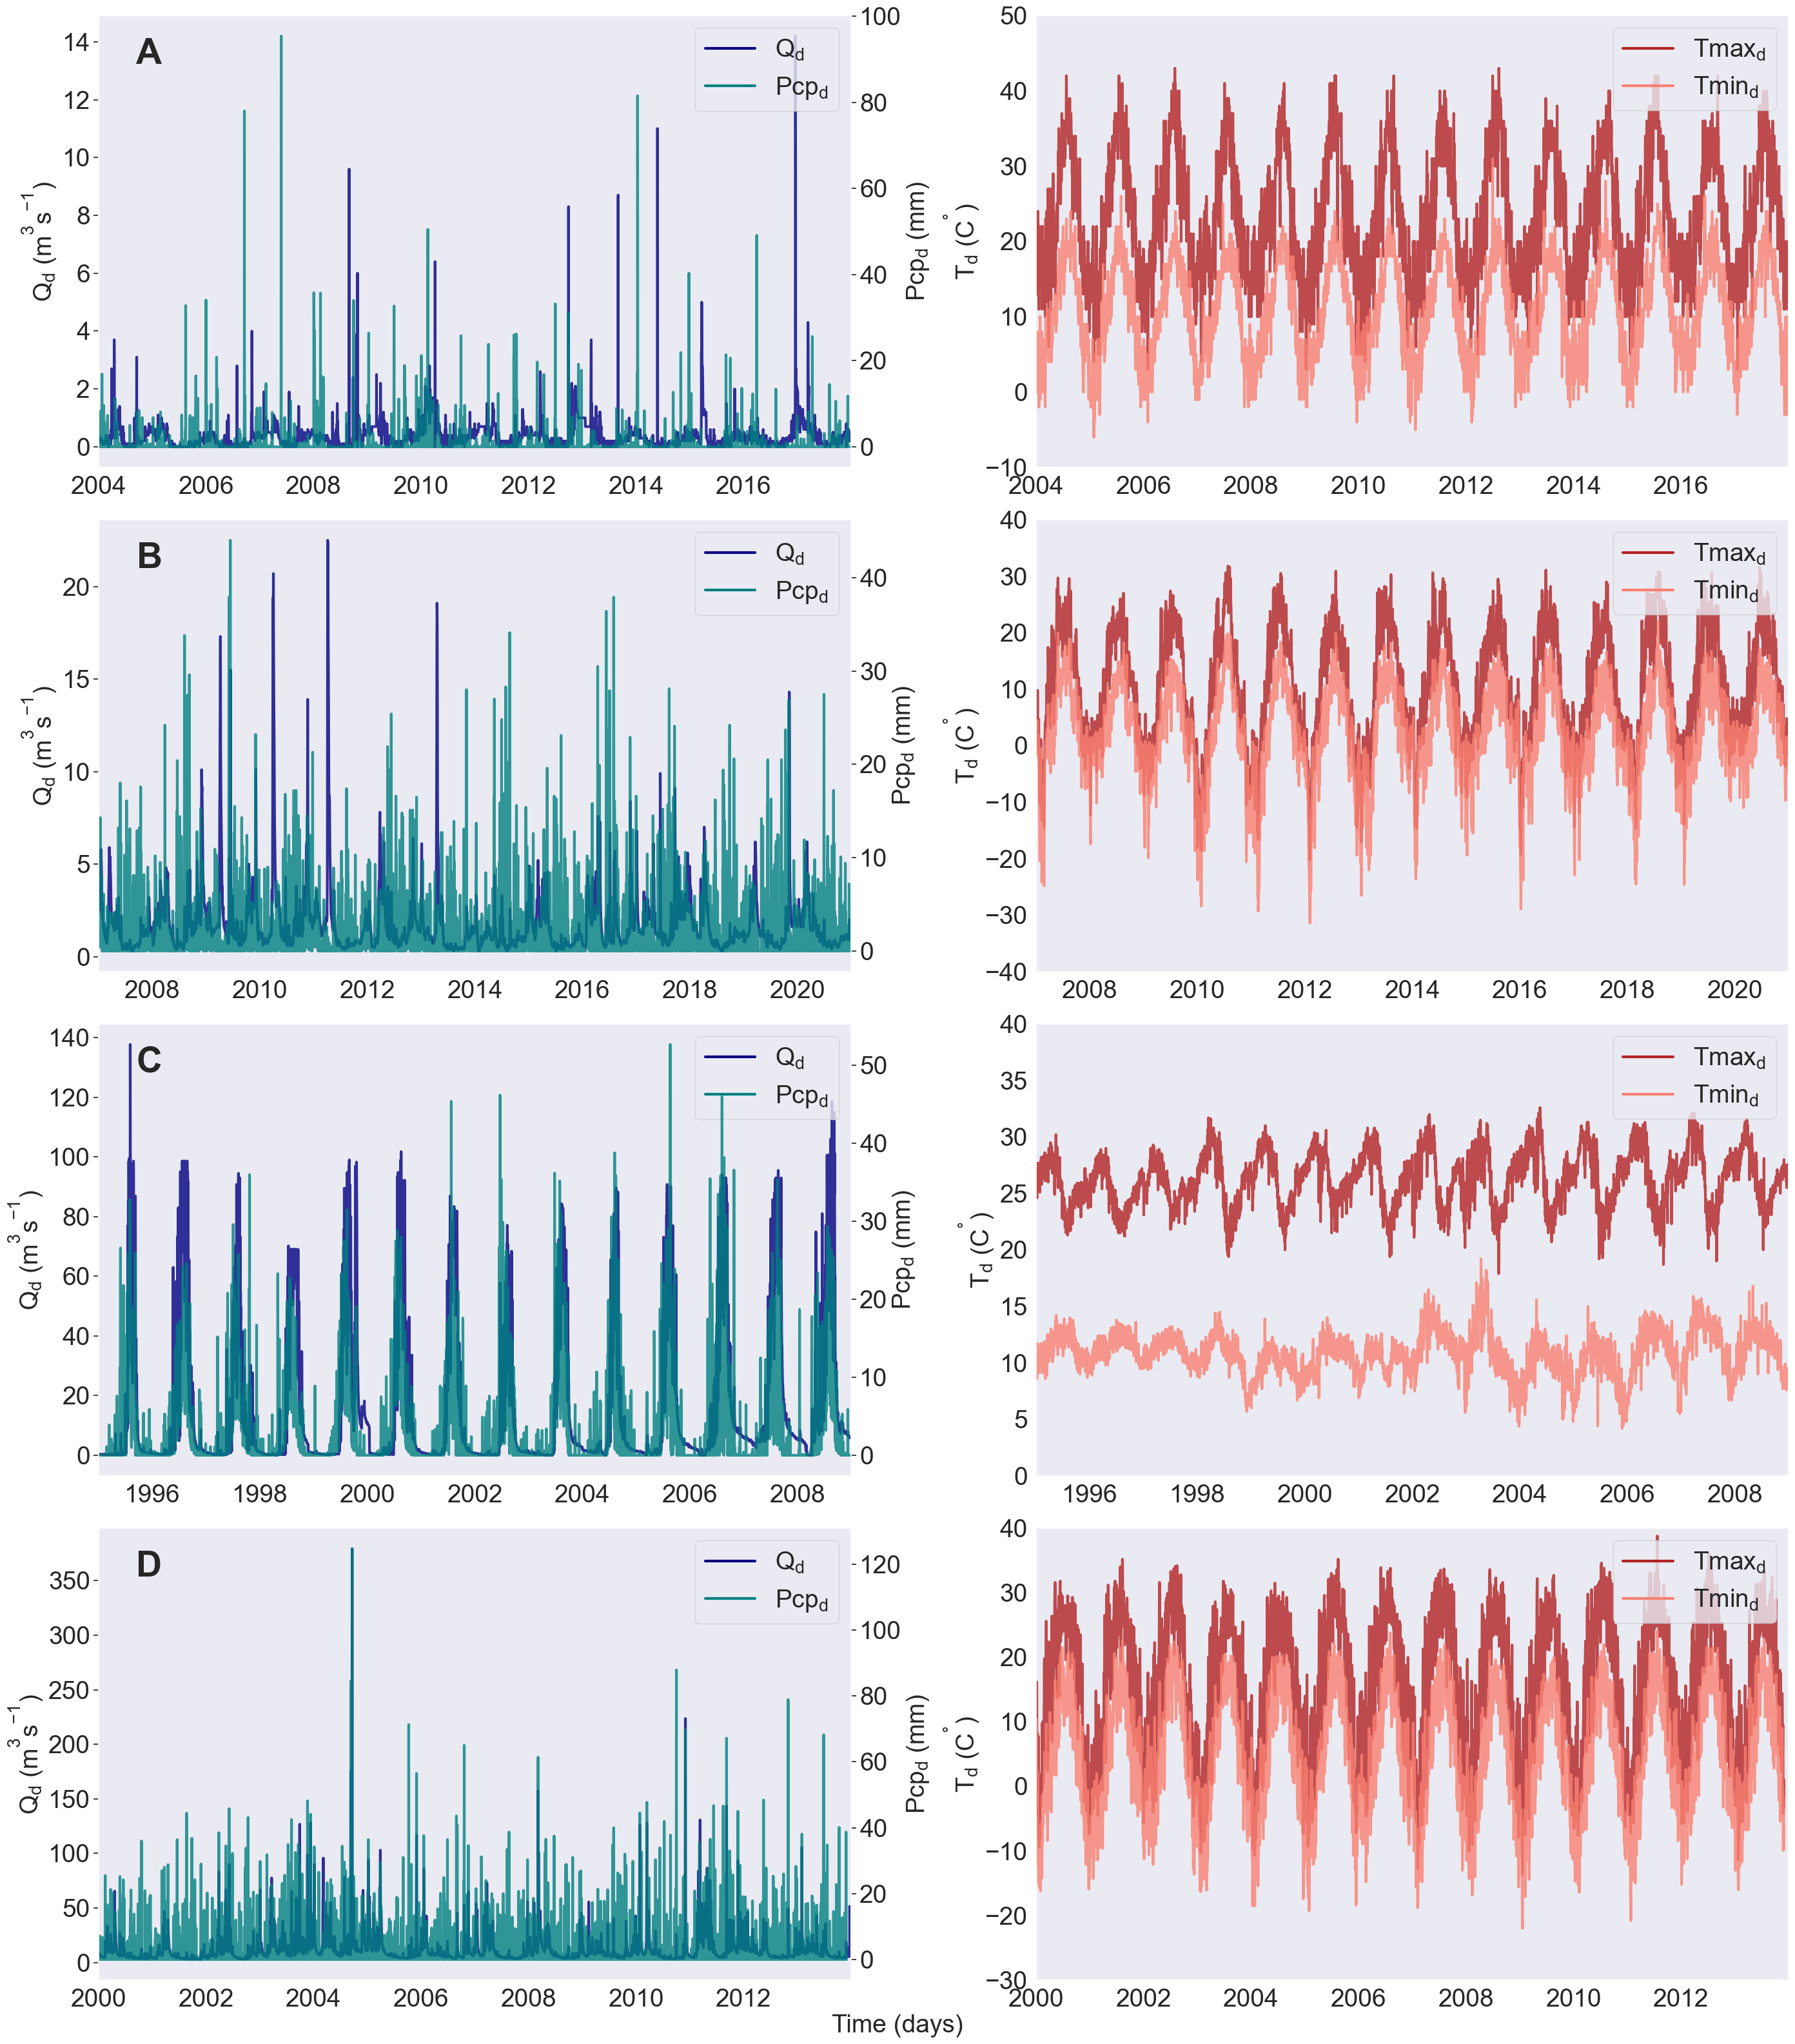

In [6]:
time_interval = 'd'
target = f'Q_{time_interval}+1'

linewidth = 3
fontsize = 28
letters = ['A', 'B', 'C', 'D']

fig, axes = plt.subplots(4, 2, figsize=(28, 32))
plt.rcParams['axes.grid'] = False

for i in range(len(country_codes)):
    
    country_code = country_codes[i]
    ax = axes[i]
    
    flow_df = utils.read_flow_data(country_code, time_interval)
    pred_var_df = utils.read_pred_var_data(country_code, time_interval, na_values=-99)
    merged = flow_df.merge(pred_var_df, on='Date', how='left')
    merged = merged.set_index('Date')
    
    # Left subplot
    
    # Plot Q
    ax1_left = ax[0]
    ax1_left_color = 'navy'
    merged[[f'Q_{time_interval}']].plot(linewidth=linewidth, ax=ax1_left, color=ax1_left_color, alpha=0.8)
    ax1_left.set(xlabel=None)
    ax1_left.set_yticklabels(ax1_left.get_yticklabels(), fontsize=fontsize)
    ylabel = f"Q$_\mathregular{{{time_interval.lower()}}}$ " + '$\mathregular{(m^{3}s^{-1})}$'
    ax1_left.set_ylabel(ylabel, fontsize=fontsize)
    ax1_left.set_xticklabels(ax1_left.get_xticklabels(), fontsize=fontsize)
    
    # Plot Pcp
    ax1_right = ax[0].twinx()
    ax1_right_color = 'teal'
    merged[[f'Pcp_{time_interval}']].plot(linewidth=linewidth, ax=ax1_right, color=ax1_right_color, alpha=0.8)
    ax1_right.set(xlabel=None)
    ax1_right.set_yticklabels(ax1_right.get_yticklabels(), fontsize=fontsize)
    ylabel = f"Pcp$_\mathregular{{{time_interval.lower()}}}$ " + '$\mathregular{(mm)}$'
    ax1_right.set_ylabel(ylabel, fontsize=fontsize)
    
    ax1_left.get_legend().remove()
    ax1_right.get_legend().remove()
    handles = [Line2D([0], [0], color=ax1_left_color, lw=linewidth), Line2D([0], [0], color=ax1_right_color, lw=linewidth)]
    labels = [f"Q$_\mathregular{{{time_interval.lower()}}}$", f"Pcp$_\mathregular{{{time_interval.lower()}}}$"]
    ax[0].legend(handles, labels, loc='upper right', fontsize=fontsize)
    
    # Right subplot
    
    # Plot Tmax
    ax2_left = ax[1]
    ylim_bottom = math.ceil(merged[f'Tmin_{time_interval}'].min() / 10) * 10 - 10
    ylim_top = math.ceil(merged[f'Tmax_{time_interval}'].max() / 10) * 10
    ax2_left.set_ylim(ylim_bottom, ylim_top)
    ax2_left_color = 'firebrick'
    merged[[f'Tmax_{time_interval}']].plot(linewidth=linewidth, ax=ax2_left, color=ax2_left_color, alpha=0.8)
    ax2_left.set(xlabel=None)
    ax2_left.set_yticklabels(ax2_left.get_yticklabels(), fontsize=fontsize)
    ylabel = f"T$_\mathregular{{{time_interval.lower()}}}$ " + '$\mathregular{(C^{\degree})}$'
    ax2_left.set_ylabel(ylabel, fontsize=fontsize)
    ax2_left.set_xticklabels(ax2_left.get_xticklabels(), fontsize=fontsize)
    
    # Plot Tmin
    ax2_right_color = 'salmon'
    merged[[f'Tmin_{time_interval}']].plot(linewidth=linewidth, ax=ax2_left, color=ax2_right_color, alpha=0.8)
    ax2_left.set(xlabel=None)
    
    ax2_left.get_legend().remove()
    handles = [Line2D([0], [0], color=ax2_left_color, lw=linewidth), Line2D([0], [0], color=ax2_right_color, lw=linewidth)]
    labels = [f"Tmax$_\mathregular{{{time_interval.lower()}}}$", f"Tmin$_\mathregular{{{time_interval.lower()}}}$"]
    ax[1].legend(handles, labels, loc='upper right', fontsize=fontsize)
    
    # Global x-axis label
    if time_interval.lower() == 'd':
        time_unit = 'days'
    elif time_interval.lower() == 'm':
        time_unit = 'months'
    fig.supxlabel(f'Time ({time_unit})', fontsize=fontsize)

    # Add letter to the left corner
    letter = letters[i]
    ax[0].text(0.05, 0.95, letter, ha='left', va='top', transform=ax[0].transAxes, size=40, weight='bold')
    
fig.tight_layout()
out_fp = f'{fig_dir}/{target}_source_data.png'
plt.savefig(out_fp, dpi=300)